# **Political Leaning, Unemployment, and Crime Rate: Is There a Correlation?**

# **Causal Question**

How does the political leaning of a US county causally affect unemployement and crime rates in a county?

**Possible Confounders**
- Race/Gender Demographics of County
- Education Levels
- Urban Development Levels

**Possible Colliders**
- Law Enforcement Policies/Legislation
- Social Unrest/Dissatisfaction
- Media Coverage



# **Pre-processing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("/content/QOL(County Level).csv")
df = df.drop(columns=['FIPS', 'Overall Rank', '1p0c', '1p1c', '1p2c', '1p3c', '1p4c', '2p0c', '2p1c', '2p2c', '2p3c', '2p4c'])
df = df.dropna()
df = df.drop_duplicates()
display(df)

for column in df.columns:
    if column not in ['LZIP', 'WaterQualityVPV', 'ParkScore2023 Rank', 'NtnlPrkCnt', 'Stu:Tea Rank', 'Diversity Rank (Race)', 'Diversity Rank (Gender)']:
        df[column] = df[column].astype('string')

df['2016 Crime Rate'] = df['2016 Crime Rate'].apply(lambda x: eval(x) / 1000)
df['Unemployment'] = df['Unemployment'].str.rstrip('%').astype('float') / 100
df['2020 PopulrMajor%'] = df['2020 PopulrMajor%'].str.rstrip('%').astype('float') / 100
df['2022 Population'] = df['2022 Population'].str.replace(',', '').astype(int)

print(df.dtypes)
print(df.info())
display(df)

,countyhelper,LSTATE,NMCNTY,LZIP,ULOCALE,2022 Population,2016 Crime Rate,Unemployment,2020PopulrVoteParty,2020 PopulrMajor%,...,ParkScore2023 Rank,%CvgCityPark,NtnlPrkCnt,%CvgStatePark,Cost of Living,2022 Median Income,AVG C2I,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
0,VACharles City County,VA,Charles City County,23030,42-Rural: Distant,"6,605",8/1000,3.21%,D,54.11%,...,-1,-1,1,0.73%,"$75,531.37","$78,038.78",96.79%,135,1,25
1,TXMcmullen County,TX,McMullen County,78072,43-Rural: Remote,576,47/1000,1.81%,R,52.06%,...,-1,-1,2,0.52%,"$63,913.28","$67,513.81",94.67%,3,2,87
2,TXTerrell County,TX,Terrell County,79848,43-Rural: Remote,693,20/1000,3.54%,R,52.06%,...,-1,-1,2,0.52%,"$64,361.02","$55,946.62",115.04%,12,3,47
3,AKSkagway Municipality,AK,Skagway Municipality,99840,43-Rural: Remote,"1,081",13/1000,7.19%,R,52.83%,...,-1,-1,8,7.66%,"$87,709.32","$85,446.30",102.65%,15,4,9
4,GABaker County,GA,Baker County,39870,42-Rural: Distant,"2,788",0,4.19%,D,49.50%,...,-1,-1,0,0.00%,"$59,389.29","$52,946.23",112.17%,26,5,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,CAOrange County,CA,Orange County,92675,21-Suburb: Large,"3,151,184",23/1000,3.27%,D,63.48%,...,-1,-1,9,6.06%,"$111,909.21","$104,789.65",106.79%,3044,3130,3128
3130,AZMaricopa County,AZ,Maricopa County,85320,43-Rural: Remote,"4,551,524",32/1000,3.46%,D,49.36%,...,-1,-1,3,2.08%,"$82,847.38","$78,828.41",105.10%,3045,3131,3132
3131,TXHarris County,TX,Harris County,77338,21-Suburb: Large,"4,780,913",41/1000,4.41%,R,52.06%,...,-1,-1,2,0.52%,"$68,223.99","$73,169.57",93.24%,3046,3132,3131
3132,ILCook County,IL,Cook County,60103,21-Suburb: Large,"5,109,292",33/1000,5.30%,D,57.54%,...,-1,-1,0,0.00%,"$81,548.25","$82,910.04",98.36%,2607,3133,3133


countyhelper                string
LSTATE                      string
NMCNTY                      string
LZIP                         int64
ULOCALE                     string
2022 Population              int64
2016 Crime Rate            float64
Unemployment               float64
2020PopulrVoteParty         string
2020 PopulrMajor%          float64
AQI%Good                    string
WaterQualityVPV              int64
ParkScore2023 Rank           int64
%CvgCityPark                string
NtnlPrkCnt                   int64
%CvgStatePark               string
Cost of Living              string
2022 Median Income          string
AVG C2I                     string
Stu:Tea Rank                 int64
Diversity Rank (Race)        int64
Diversity Rank (Gender)      int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 0 to 3133
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 

,countyhelper,LSTATE,NMCNTY,LZIP,ULOCALE,2022 Population,2016 Crime Rate,Unemployment,2020PopulrVoteParty,2020 PopulrMajor%,...,ParkScore2023 Rank,%CvgCityPark,NtnlPrkCnt,%CvgStatePark,Cost of Living,2022 Median Income,AVG C2I,Stu:Tea Rank,Diversity Rank (Race),Diversity Rank (Gender)
0,VACharles City County,VA,Charles City County,23030,42-Rural: Distant,6605,0.000008,0.0321,D,0.5411,...,-1,-1,1,0.73%,"$75,531.37","$78,038.78",96.79%,135,1,25
1,TXMcmullen County,TX,McMullen County,78072,43-Rural: Remote,576,0.000047,0.0181,R,0.5206,...,-1,-1,2,0.52%,"$63,913.28","$67,513.81",94.67%,3,2,87
2,TXTerrell County,TX,Terrell County,79848,43-Rural: Remote,693,0.000020,0.0354,R,0.5206,...,-1,-1,2,0.52%,"$64,361.02","$55,946.62",115.04%,12,3,47
3,AKSkagway Municipality,AK,Skagway Municipality,99840,43-Rural: Remote,1081,0.000013,0.0719,R,0.5283,...,-1,-1,8,7.66%,"$87,709.32","$85,446.30",102.65%,15,4,9
4,GABaker County,GA,Baker County,39870,42-Rural: Distant,2788,0.000000,0.0419,D,0.4950,...,-1,-1,0,0.00%,"$59,389.29","$52,946.23",112.17%,26,5,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,CAOrange County,CA,Orange County,92675,21-Suburb: Large,3151184,0.000023,0.0327,D,0.6348,...,-1,-1,9,6.06%,"$111,909.21","$104,789.65",106.79%,3044,3130,3128
3130,AZMaricopa County,AZ,Maricopa County,85320,43-Rural: Remote,4551524,0.000032,0.0346,D,0.4936,...,-1,-1,3,2.08%,"$82,847.38","$78,828.41",105.10%,3045,3131,3132
3131,TXHarris County,TX,Harris County,77338,21-Suburb: Large,4780913,0.000041,0.0441,R,0.5206,...,-1,-1,2,0.52%,"$68,223.99","$73,169.57",93.24%,3046,3132,3131
3132,ILCook County,IL,Cook County,60103,21-Suburb: Large,5109292,0.000033,0.0530,D,0.5754,...,-1,-1,0,0.00%,"$81,548.25","$82,910.04",98.36%,2607,3133,3133


# **EDA (Exploratory Data Analysis)**

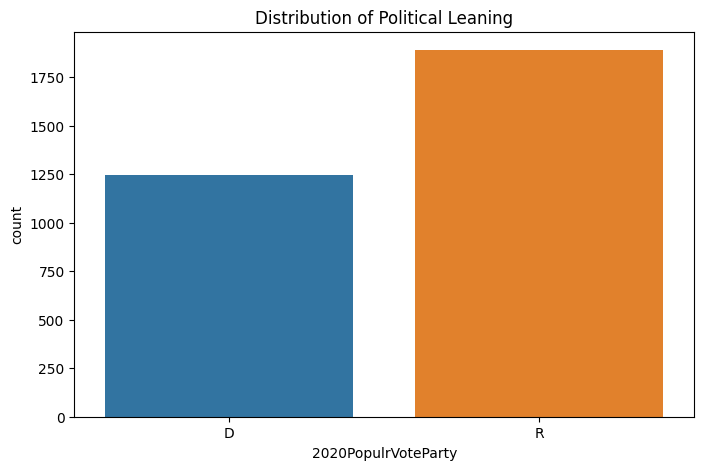

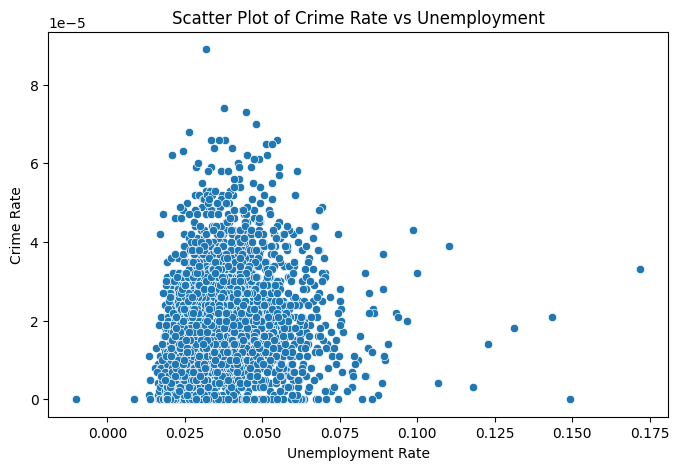

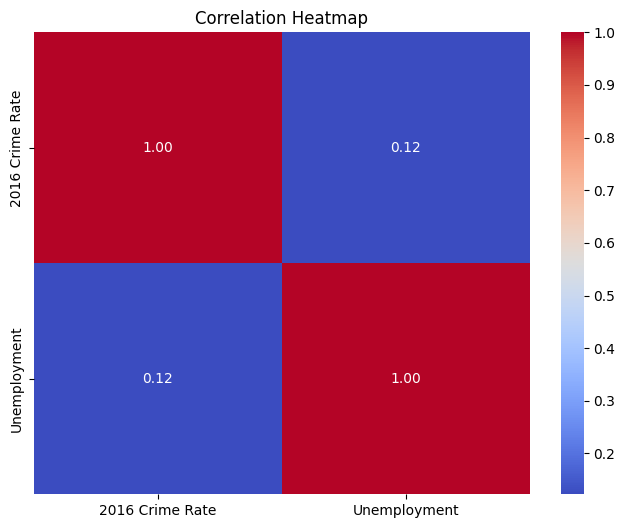

Statistics for counties with popular party 'D':
Mean: 160682.89
Median: 41412.0
Mode: 4688

Statistics for counties with popular party 'R':
Mean: 70330.00
Median: 19901.0
Mode: 576


In [ ]:
# Distribution of Political Leaning
plt.figure(figsize=(8, 5))
sns.countplot(x='2020PopulrVoteParty', data=df)
plt.title('Distribution of Political Leaning')
plt.show()



# Scatter plot of Crime Rate vs Unemployment
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Unemployment', y='2016 Crime Rate', data=df)
plt.title('Scatter Plot of Crime Rate vs Unemployment')
plt.xlabel('Unemployment Rate')
plt.ylabel('Crime Rate')
plt.show()



# Correlation Heatmap
correlation_matrix = df[['2016 Crime Rate', 'Unemployment']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



#Median Population of Political Parties
df_d = df[df['2020PopulrVoteParty'] == 'D']
df_r = df[df['2020PopulrVoteParty'] == 'R']

mean_d = df_d['2022 Population'].mean()
median_d = df_d['2022 Population'].median()
mode_d = df_d['2022 Population'].mode().iloc[0]  # Mode can return multiple values, so we take the first one

mean_r = df_r['2022 Population'].mean()
median_r = df_r['2022 Population'].median()
mode_r = df_r['2022 Population'].mode().iloc[0]

print("Statistics for counties with popular party 'D':")
print(f"Mean: {mean_d:.2f}")
print(f"Median: {median_d}")
print(f"Mode: {mode_d}")

print("\nStatistics for counties with popular party 'R':")
print(f"Mean: {mean_r:.2f}")
print(f"Median: {median_r}")
print(f"Mode: {mode_r}")

# **Regression Analysis**

In [ ]:
print(df['2016 Crime Rate'].describe())
print(df['Unemployment'].describe())


df['log_Unemployment'] = np.log(df['Unemployment'] + 1e-10)
df['log_CrimeRate'] = np.log(df['2016 Crime Rate'] + 1e-10)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

exog = df[['log_Unemployment', 'log_CrimeRate']]
endog = (df['2020PopulrVoteParty'] == 'D').astype(int)

logit_model = sm.Logit(endog, sm.add_constant(exog)).fit()

print(logit_model.summary())

count    3134.000000
mean        0.000019
std         0.000012
min         0.000000
25%         0.000011
50%         0.000017
75%         0.000026
max         0.000089
Name: 2016 Crime Rate, dtype: float64
count    3134.000000
mean        0.037369
std         0.013372
min        -0.010000
25%         0.028100
50%         0.035300
75%         0.043800
max         0.171900
Name: Unemployment, dtype: float64
Optimization terminated successfully.
         Current function value: 0.638113
         Iterations 6
                            Logit Regression Results                           
Dep. Variable:     2020PopulrVoteParty   No. Observations:                 3133
Model:                           Logit   Df Residuals:                     3130
Method:                            MLE   Df Model:                            2
Date:                 Sun, 19 Nov 2023   Pseudo R-squ.:                 0.05034
Time:                         17:45:54   Log-Likelihood:                -1999.2
converged

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# **Conclusion and Insights**

The logistic regression model indicates that the log odds of an area leaning Democratic (2020PopulrVoteParty being 'D') are positively associated with both unemployment and crime rate while the log odds of an area leaning Republican (2020PopulrVoteParty being 'D') are negatively associated with both unemployment and crime rate. Additionally, for a one-unit increase in the log-transformed Crime Rate variable (log_CrimeRate), the log odds of an area leaning Democratic increase by 0.1419. Both log_Unemployment and log_CrimeRate also have statistically significant coefficients, as indicated by their very low p-values (both approximate to p=0 given 4 significant figures). From this, we can conclude from our data that Democraticly leaning areas of the United States have higher crime and unemployment rates.

Adressing some confounders relating to our question, there is no direct way to quantify general race, education, or urban development statistics given our dataset, so we cannot control for these. However, we can make educated infrences considering these confounders. Democratic majority counties have much larger populations (mean population of democratic counties: 160683) than republican majority counties (mean population of republican counties: 70330). This would most likely indicate larger distributions for race, education, and urban development, making it less likely that either one of these confounders are predominantly signficant in democratic counties overall.

Adressing some colliders, all the ones we considered are related to dynamic and contemporary matters that are also not well quantified by our dataset, so again it is difficult to control for these. However, it is important to note that multiple relevant relations used in this project are attributed to different years (ex. 2016 Crime Rate and 2020PopulrVoteParty); this affects our colliders since since our dataset is from 2022 and social unrest, media coverage, and local legislation have most definetley changed since 2016 crime rate statistics were calculated and since the 2020 election.

The answers and insights from this project will help drive policy by influencing resource allocation and crime prevention strategies. Legislators in democratic counties should emphasize on creating policies that could stimulate job growth and security while also changing policy to make social sevice and possibly even community policing more accessible/prominent.

In [ ]:
# %shell
!jupyter nbconvert --to html "/content/ENMHW2Final.ipynb"

[NbConvertApp] Converting notebook /content/ENMHW2Final.ipynb to html
[NbConvertApp] Writing 773004 bytes to /content/ENMHW2Final.html
